<a href="https://colab.research.google.com/github/runtorain/GenerativeDeepLearning/blob/main/MLPinPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np

In [12]:
# Hyperparameters
NUM_CLASSES = 10
BATCH_SIZE = 32
LEARNING_RATE = 0.0005
EPOCHS = 10

# Data Preparation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

In [13]:
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

100%|██████████| 170M/170M [00:04<00:00, 35.4MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [14]:
train_dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

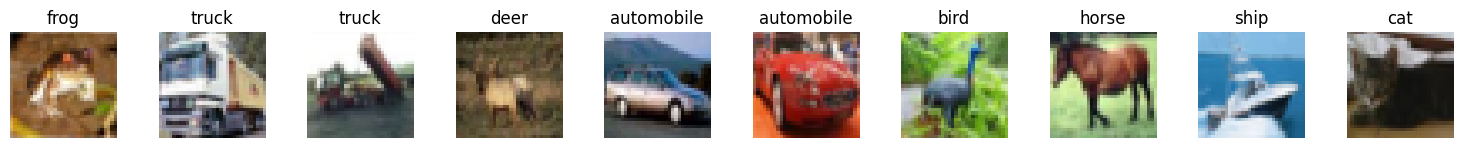

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Define CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Get 10 sample images and their labels
samples = [train_dataset[i] for i in range(10)]
images, labels = zip(*samples)

# Unnormalize the images for proper visualization
unnormalize = lambda x: (x * 0.5 + 0.5).numpy()  # Scale back to [0, 1]

# Plot the images
fig, axes = plt.subplots(1, 10, figsize=(15, 1.5))
for img, label, ax in zip(images, labels, axes):
    ax.imshow(np.transpose(unnormalize(img), (1, 2, 0)))  # Convert CHW to HWC
    ax.axis('off')
    ax.set_title(class_names[label])

plt.tight_layout()
plt.show()


In [16]:
train_dataset[0]

(tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
          [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
          [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
          ...,
          [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
          [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
          [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],
 
         [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
          [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
          [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
          ...,
          [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
          [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
          [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],
 
         [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
          [-0.8431, -1.0000,

In [22]:
train_dataset[0][0].size()

torch.Size([3, 32, 32])

In [23]:
# Define the Model
class SimpleNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 32 * 3, 200)
        self.fc2 = nn.Linear(200, 150)
        self.fc3 = nn.Linear(150, num_classes)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return self.softmax(x)

In [24]:
model = SimpleNN(NUM_CLASSES)
print(model)

SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3072, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=150, bias=True)
  (fc3): Linear(in_features=150, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)


In [25]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [26]:
# Training Loop
for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Epoch [{epoch+1}/{EPOCHS}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100*correct/total:.2f}%")


Epoch [1/10], Loss: 2.0842, Accuracy: 37.08%
Epoch [2/10], Loss: 2.0282, Accuracy: 42.74%
Epoch [3/10], Loss: 2.0025, Accuracy: 45.28%
Epoch [4/10], Loss: 1.9859, Accuracy: 47.14%
Epoch [5/10], Loss: 1.9682, Accuracy: 48.93%
Epoch [6/10], Loss: 1.9553, Accuracy: 50.26%
Epoch [7/10], Loss: 1.9435, Accuracy: 51.51%
Epoch [8/10], Loss: 1.9338, Accuracy: 52.45%
Epoch [9/10], Loss: 1.9251, Accuracy: 53.24%
Epoch [10/10], Loss: 1.9180, Accuracy: 54.08%


In [27]:
# Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100*correct/total:.2f}%")

Test Accuracy: 48.94%


In [28]:
# Save the model's state dictionary
torch.save(model.state_dict(), "simple_nn.pth")

In [30]:
# Define the model architecture
loaded_model = SimpleNN(NUM_CLASSES)

# Load the state dictionary
loaded_state_dict = torch.load("simple_nn.pth", weights_only=True)
loaded_model.load_state_dict(loaded_state_dict)

# Put the model in evaluation mode
loaded_model.eval()

SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3072, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=150, bias=True)
  (fc3): Linear(in_features=150, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)

In [31]:
# Evaluation
loaded_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = loaded_model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100*correct/total:.2f}%")

Test Accuracy: 48.94%


In [32]:
# Save the entire model
torch.save(model, "simple_nn_full.pth")

In [36]:
# Load the entire model (trusted source)
model2 = torch.load("simple_nn_full.pth", weights_only=False)

# Put the model in evaluation mode
model2.eval()


SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3072, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=150, bias=True)
  (fc3): Linear(in_features=150, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)

In [37]:
# Evaluation
model2.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model2(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100*correct/total:.2f}%")

Test Accuracy: 48.94%


In [38]:
print("Trainable Parameters:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.numel()} parameters, shape: {param.shape}")


Trainable Parameters:
fc1.weight: 614400 parameters, shape: torch.Size([200, 3072])
fc1.bias: 200 parameters, shape: torch.Size([200])
fc2.weight: 30000 parameters, shape: torch.Size([150, 200])
fc2.bias: 150 parameters, shape: torch.Size([150])
fc3.weight: 1500 parameters, shape: torch.Size([10, 150])
fc3.bias: 10 parameters, shape: torch.Size([10])


In [39]:
from torchsummary import summary

# Provide the input shape (excluding batch size)
summary(model, input_size=(3, 32, 32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                 [-1, 3072]               0
            Linear-2                  [-1, 200]         614,600
              ReLU-3                  [-1, 200]               0
            Linear-4                  [-1, 150]          30,150
              ReLU-5                  [-1, 150]               0
            Linear-6                   [-1, 10]           1,510
           Softmax-7                   [-1, 10]               0
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.03
Params size (MB): 2.47
Estimated Total Size (MB): 2.51
----------------------------------------------------------------


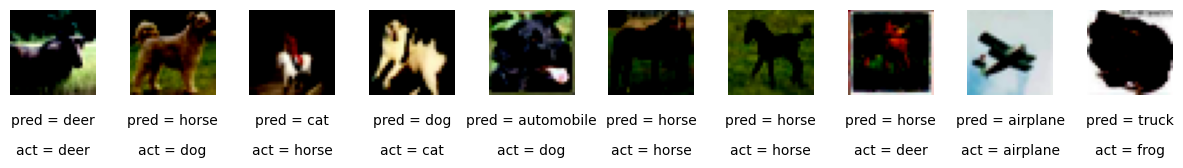

In [40]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# CIFAR-10 class labels
CLASSES = np.array([
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
])

# Put the model in evaluation mode
model.eval()

# Convert test data to a PyTorch DataLoader
from torch.utils.data import DataLoader

test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)
x_test, y_test = next(iter(test_loader))  # Get all test data in one batch

# Move data to device (if using GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x_test, y_test = x_test.to(device), y_test.to(device)

# Make predictions
with torch.no_grad():
    logits = model(x_test)  # Raw output from the model
    preds = torch.softmax(logits, dim=1).cpu().numpy()  # Convert to probabilities

# Convert predictions and actual labels to class names
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[y_test.cpu().numpy()]

# Randomly select samples to display
n_to_show = 10
indices = np.random.choice(len(x_test), n_to_show, replace=False)

# Plot the selected samples with predictions and actual labels
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx].cpu().permute(1, 2, 0).numpy()  # Convert tensor to HWC format
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)

plt.show()


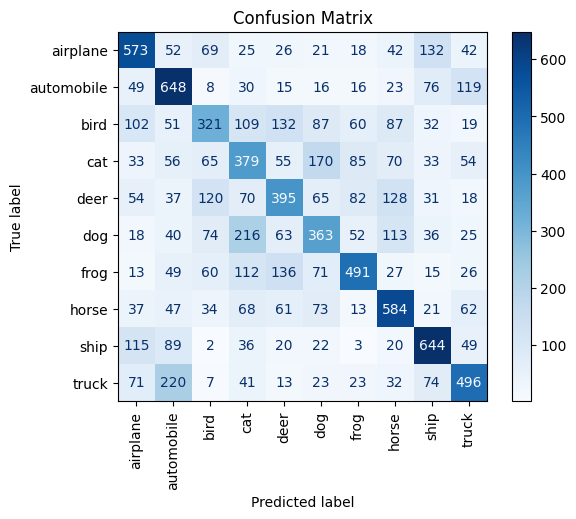

In [41]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Put the model in evaluation mode
model.eval()

# Convert test data to a DataLoader
from torch.utils.data import DataLoader

test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize arrays to store true labels and predictions
true_labels = []
pred_labels = []

# Loop through test data
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        # Move data to the same device as the model
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)

        # Get predictions
        logits = model(x_batch)
        preds = torch.argmax(logits, dim=1)  # Get predicted class indices

        # Append true and predicted labels
        true_labels.extend(y_batch.cpu().numpy())
        pred_labels.extend(preds.cpu().numpy())

# Convert to NumPy arrays
true_labels = np.array(true_labels)
pred_labels = np.array(pred_labels)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=CLASSES)
disp.plot(cmap=plt.cm.Blues, xticks_rotation="vertical")
plt.title("Confusion Matrix")
plt.show()
